In [1]:
using RegularizedSystems
using VSTom
using PyPlot
using ProgressMeter

  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:438
  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:438
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/lstagner/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/lstagner/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl, in expression starting on line 429
  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:429
  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:429
  likely near /home/lstagner/.julia/v0.4/NetCDF/src/NetCDF.jl:429
 

In [2]:
function make_synthetic_data{T<:Real}(A::Array{T,2},dist::Array{T,2},n::T,b::T,dE::T,dP::T)
    y = (dE*dP) * (A*vec(dist))
    
    scale = n*mean(sqrt(y))
    yerr = scale .* max(sqrt(y),sqrt(b)) .* randn(length(y))
    
    noisy_spectrum = y .+ yerr
    noisy_background = b .+ scale*sqrt(b).*randn(length(y))
    
    scale_est = n*mean(sqrt(abs(noisy_spectrum)))
    
    err = scale_est .* max(sqrt(abs(noisy_spectrum)),sqrt(abs(noisy_background)))
    
    return noisy_spectrum, err
end

make_synthetic_data (generic function with 1 method)

In [3]:
wf2 = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/Asger\ source\ code/Transfer_matrix_2_views.nc")
wf3 = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/Asger\ source\ code/Transfer_matrix_3_views.nc")
wf4 = read_ncdf("/home/lstagner/Dropbox/Inversion_method_analysis/Asger\ source\ code/Transfer_matrix_4_views.nc")

  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely near In[3]:1
  likely n

Dict{AbstractString,Any} with 3 entries:
  "transfer_matrix" => 923x5625 Array{Float64,2}:…
  "E"               => [1.0,3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0  …  131.0,…
  "p"               => [-0.986667,-0.96,-0.933333,-0.906667,-0.88,-0.853333,-0.…

In [4]:
nenergy = 20
npitch = 20

test_dists = read_ncdf("data/test_distributions.cdf");
p = vec(test_dists["P"][:,1])
E = vec(test_dists["E"][1,:])
transp_full = test_dists["transp"]


energy_full = wf2["E"]
pitch_full  = wf2["p"]
A_2_full = resize_transfer_matrix(wf2["transfer_matrix"],energy_full,pitch_full,E,p)
A_3_full = resize_transfer_matrix(wf3["transfer_matrix"],energy_full,pitch_full,E,p)
A_4_full = resize_transfer_matrix(wf4["transfer_matrix"],energy_full,pitch_full,E,p)

energy_full = E
pitch_full = p

dE_full = abs(energy_full[2] - energy_full[1])
dP_full = abs(pitch_full[2] - pitch_full[1])

energy = linspace(20.0,maximum(energy_full),nenergy)
pitch = linspace(extrema(pitch_full)...,npitch)
A_2 = resize_transfer_matrix(A_2_full,energy_full,pitch_full,energy,pitch);
A_3 = resize_transfer_matrix(A_3_full,energy_full,pitch_full,energy,pitch);
A_4 = resize_transfer_matrix(A_4_full,energy_full,pitch_full,energy,pitch);

dE = abs(energy[2]-energy[1])
dP = abs(pitch[2]-pitch[1]);
transp = bilinear(transp_full,E,p,energy,pitch);

In [5]:
nr,nc = size(A_2)
x_2 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_2_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TSVDFunctional(A_2,spec,err)
    k = discrete_lcurve(RF,1:120)
    sol = minimize(RF,k)
    x_2[:,i] = max(sol.x,0)/(dE*dP)
end

 in depwarn at deprecated.jl:73
 in int at deprecated.jl:276
 in discrete_lcurve at /home/lstagner/publications/Inversion_Method_Analysis/src/lcurve.jl:38
 [inlined code] from In[5]:6
 in anonymous at no file:5
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/lstagner/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/lstagner/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[5], in expression starting on line 3


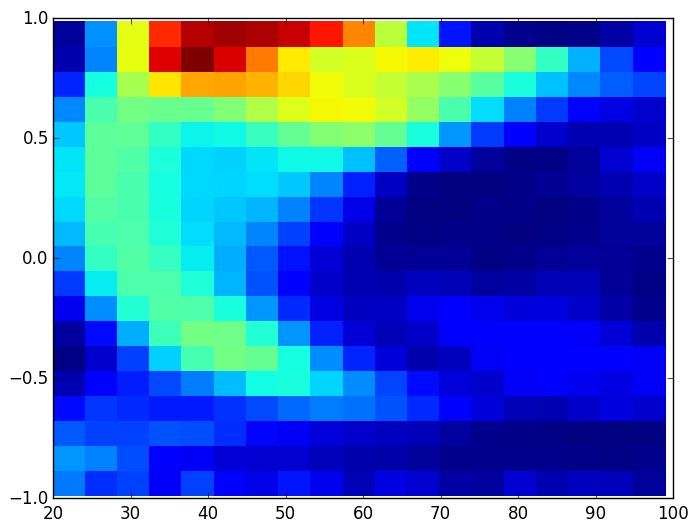

PyObject <matplotlib.collections.PolyCollection object at 0x7fac73c20ef0>

In [6]:
pcolor(energy,pitch,reshape(mean(x_2,2),20,20))

In [7]:
nr,nc = size(A_3)
x_3 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_3_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TSVDFunctional(A_3,spec,err)
    k = discrete_lcurve(RF,1:180)
    sol = minimize(RF,k)
    x_3[:,i] = max(sol.x,0)/(dE*dP)
end

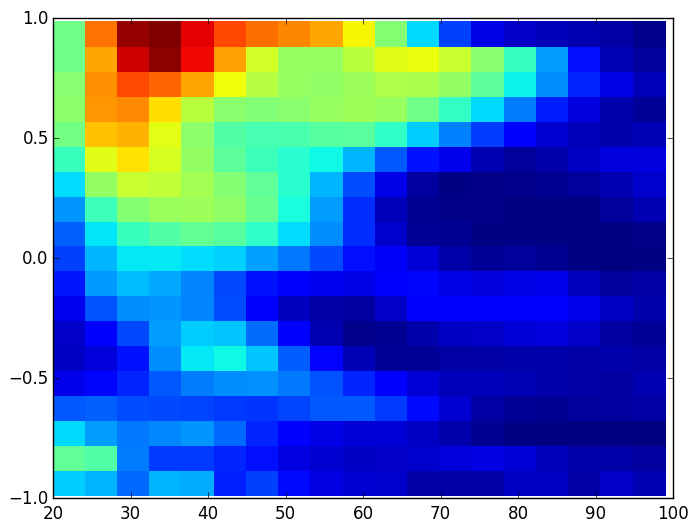

PyObject <matplotlib.collections.PolyCollection object at 0x7fac654fe358>

In [8]:
pcolor(energy,pitch,reshape(mean(x_3,2),20,20))

In [9]:
nr,nc = size(A_4)
x_4 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_4_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TSVDFunctional(A_4,spec,err)
    k = discrete_lcurve(RF,1:180)
    sol = minimize(RF,k)
    x_4[:,i] = max(sol.x,0)/(dE*dP)
end

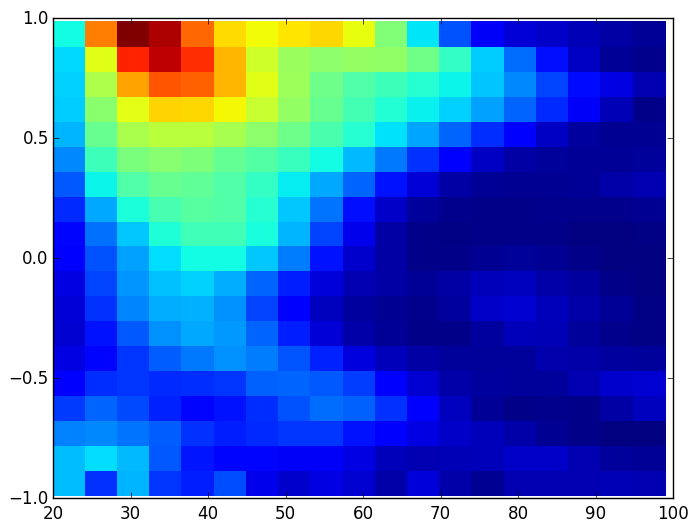

PyObject <matplotlib.collections.PolyCollection object at 0x7fac65404518>

In [10]:
pcolor(energy,pitch,reshape(mean(x_4,2),20,20))

In [11]:
tsvd_x_2_mean = reshape(mean(x_2,2),20,20)
tsvd_x_2_var = reshape(var(x_2,2),20,20)

tsvd_x_3_mean = reshape(mean(x_3,2),20,20)
tsvd_x_3_var = reshape(var(x_3,2),20,20)

tsvd_x_4_mean = reshape(mean(x_4,2),20,20)
tsvd_x_4_var = reshape(var(x_4,2),20,20);

# TIK0

In [12]:
nr,nc = size(A_2)
x_2 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_2_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TikhonovFunctional(A_2,spec,err,(eye(nc),))
    alpha = lcurve(RF,log_alpha_range=(-10,5),nseeds=20)
    sol = minimize(RF,alpha)
    x_2[:,i] = max(sol.x,0)/(dE*dP)
end

nr,nc = size(A_3)
x_3 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_3_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TikhonovFunctional(A_3,spec,err,(eye(nc),))
    alpha = lcurve(RF,log_alpha_range=(-10,5),nseeds=20)
    sol = minimize(RF,alpha)
    x_3[:,i] = max(sol.x,0)/(dE*dP)
end

nr,nc = size(A_4)
x_4 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_4_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TikhonovFunctional(A_4,spec,err,(eye(nc),))
    alpha = lcurve(RF,log_alpha_range=(-10,5),nseeds=20)
    sol = minimize(RF,alpha)
    x_4[:,i] = max(sol.x,0)/(dE*dP)
end

In [13]:
tik0_x_2_mean = reshape(mean(x_2,2),20,20)
tik0_x_2_var = reshape(var(x_2,2),20,20)

tik0_x_3_mean = reshape(mean(x_3,2),20,20)
tik0_x_3_var = reshape(var(x_3,2),20,20)

tik0_x_4_mean = reshape(mean(x_4,2),20,20)
tik0_x_4_var = reshape(var(x_4,2),20,20);

In [14]:
L1E,L1p = gradEP(energy,pitch)

nr,nc = size(A_2)
x_2 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_2_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TikhonovFunctional(A_2,spec,err,(L1E,L1p))
    alpha = lcurve(RF,log_alpha_range=(0,20),nseeds=20)
    sol = minimize(RF,alpha)
    x_2[:,i] = max(sol.x,0)/(dE*dP)
end

nr,nc = size(A_3)
x_3 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_3_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TikhonovFunctional(A_3,spec,err,(L1E,L1p))
    alpha = lcurve(RF,log_alpha_range=(0,20),nseeds=20)
    sol = minimize(RF,alpha)
    x_3[:,i] = max(sol.x,0)/(dE*dP)
end

nr,nc = size(A_4)
x_4 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_4_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = TikhonovFunctional(A_4,spec,err,(L1E,L1p))
    alpha = lcurve(RF,log_alpha_range=(0,20),nseeds=20)
    sol = minimize(RF,alpha)
    x_4[:,i] = max(sol.x,0)/(dE*dP)
end

In [15]:
tik1_x_2_mean = reshape(mean(x_2,2),20,20)
tik1_x_2_var = reshape(var(x_2,2),20,20)

tik1_x_3_mean = reshape(mean(x_3,2),20,20)
tik1_x_3_var = reshape(var(x_3,2),20,20)

tik1_x_4_mean = reshape(mean(x_4,2),20,20)
tik1_x_4_var = reshape(var(x_4,2),20,20);

In [42]:
nr,nc = size(A_2)
x_2 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_2_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = FisherFunctional(A_2,spec,err,(L1E,L1p))
    alpha = lcurve(RF,log_alpha_range=(0,20),nseeds=20,kwargs={:maxiter=>5,:verbose=>false})
    sol = minimize(RF,alpha,maxiter=5)
    x_2[:,i] = max(sol.x,0)/(dE*dP)
end

nr,nc = size(A_3)
x_3 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_3_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = FisherFunctional(A_3,spec,err,(L1E,L1p))
    alpha = lcurve(RF,log_alpha_range=(0,20),nseeds=20,kwargs={:maxiter=>5,:verbose=>false})
    sol = minimize(RF,alpha,maxiter=5)
    x_3[:,i] = max(sol.x,0)/(dE*dP)
end

nr,nc = size(A_4)
x_4 = zeros(nc,25)
for i=1:25
    spec,err = make_synthetic_data(A_4_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = FisherFunctional(A_4,spec,err,(L1E,L1p))
    alpha = lcurve(RF,log_alpha_range=(0,20),nseeds=20,kwargs={:maxiter=>5,:verbose=>false})
    sol = minimize(RF,alpha,maxiter=5)
    x_4[:,i] = max(sol.x,0)/(dE*dP)
end


Use "Dict{Any,Any}(a=>b, ...)" instead.

Use "Dict{Any,Any}(a=>b, ...)" instead.

Use "Dict{Any,Any}(a=>b, ...)" instead.


In [43]:
mf_x_2_mean = reshape(mean(x_2,2),20,20)
mf_x_2_var = reshape(var(x_2,2),20,20)

mf_x_3_mean = reshape(mean(x_3,2),20,20)
mf_x_3_var = reshape(var(x_3,2),20,20)

mf_x_4_mean = reshape(mean(x_4,2),20,20)
mf_x_4_var = reshape(var(x_4,2),20,20);

In [30]:
nr,nc = size(A_2)
x_2 = zeros(nc,25)
@showprogress for i=1:25
    spec,err = make_synthetic_data(A_2_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = EntropyFunctional(A_2,spec,err)
    alpha = lcurve(RF,log_alpha_range=(-10,-3),nseeds=21)
    sol = minimize(RF,alpha)
    x_2[:,i] = max(sol.x,0)/(dE*dP)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:30:22


In [31]:
nr,nc = size(A_3)
x_3 = zeros(nc,25)
@showprogress for i=1:25
    spec,err = make_synthetic_data(A_3_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = EntropyFunctional(A_3,spec,err)
    alpha = lcurve(RF,log_alpha_range=(-10,-3),nseeds=21)
    sol = minimize(RF,alpha)
    x_3[:,i] = max(sol.x,0)/(dE*dP)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:31:55


In [32]:
nr,nc = size(A_4)
x_4 = zeros(nc,25)
@showprogress for i=1:25
    spec,err = make_synthetic_data(A_4_full,transp_full,0.5,1.25e14,dE_full,dP_full)
    RF = EntropyFunctional(A_4,spec,err)
    alpha = lcurve(RF,log_alpha_range=(-10,-3),nseeds=21)
    sol = minimize(RF,alpha)
    x_4[:,i] = max(sol.x,0)/(dE*dP)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:33:53


In [33]:
me_x_2_mean = reshape(mean(x_2,2),20,20)
me_x_2_var = reshape(var(x_2,2),20,20)

me_x_3_mean = reshape(mean(x_3,2),20,20)
me_x_3_var = reshape(var(x_3,2),20,20)

me_x_4_mean = reshape(mean(x_4,2),20,20)
me_x_4_var = reshape(var(x_4,2),20,20);

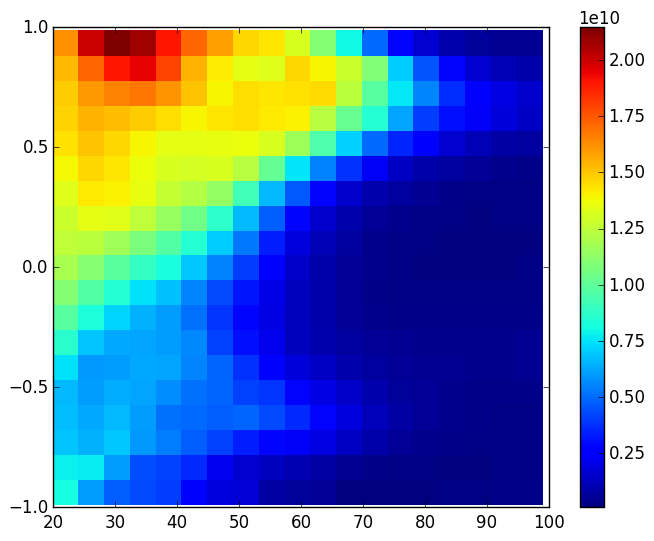

PyObject <matplotlib.colorbar.Colorbar object at 0x7fac637ce9e8>

In [47]:
pcolor(energy,pitch,me_x_4_mean)
colorbar()

In [44]:
using NetCDF
# Write synthetic data to file
fname = "data/view_analysis.cdf"

isfile(fname) && rm(fname)

nen_id = NcDim("nenergy",20)
np_id = NcDim("npitch",20)

tsvd_x_2_mean_varid = NcVar("tsvd_x_2_mean",[np_id,nen_id])
tsvd_x_3_mean_varid = NcVar("tsvd_x_3_mean",[np_id,nen_id])
tsvd_x_4_mean_varid = NcVar("tsvd_x_4_mean",[np_id,nen_id])

tsvd_x_2_var_varid = NcVar("tsvd_x_2_var",[np_id,nen_id])
tsvd_x_3_var_varid = NcVar("tsvd_x_3_var",[np_id,nen_id])
tsvd_x_4_var_varid = NcVar("tsvd_x_4_var",[np_id,nen_id])

tik0_x_2_mean_varid = NcVar("tik0_x_2_mean",[np_id,nen_id])
tik0_x_3_mean_varid = NcVar("tik0_x_3_mean",[np_id,nen_id])
tik0_x_4_mean_varid = NcVar("tik0_x_4_mean",[np_id,nen_id])

tik0_x_2_var_varid = NcVar("tik0_x_2_var",[np_id,nen_id])
tik0_x_3_var_varid = NcVar("tik0_x_3_var",[np_id,nen_id])
tik0_x_4_var_varid = NcVar("tik0_x_4_var",[np_id,nen_id])

tik1_x_2_mean_varid = NcVar("tik1_x_2_mean",[np_id,nen_id])
tik1_x_3_mean_varid = NcVar("tik1_x_3_mean",[np_id,nen_id])
tik1_x_4_mean_varid = NcVar("tik1_x_4_mean",[np_id,nen_id])

tik1_x_2_var_varid = NcVar("tik1_x_2_var",[np_id,nen_id])
tik1_x_3_var_varid = NcVar("tik1_x_3_var",[np_id,nen_id])
tik1_x_4_var_varid = NcVar("tik1_x_4_var",[np_id,nen_id])

mf_x_2_mean_varid = NcVar("mf_x_2_mean",[np_id,nen_id])
mf_x_3_mean_varid = NcVar("mf_x_3_mean",[np_id,nen_id])
mf_x_4_mean_varid = NcVar("mf_x_4_mean",[np_id,nen_id])

mf_x_2_var_varid = NcVar("mf_x_2_var",[np_id,nen_id])
mf_x_3_var_varid = NcVar("mf_x_3_var",[np_id,nen_id])
mf_x_4_var_varid = NcVar("mf_x_4_var",[np_id,nen_id])

me_x_2_mean_varid = NcVar("me_x_2_mean",[np_id,nen_id])
me_x_3_mean_varid = NcVar("me_x_3_mean",[np_id,nen_id])
me_x_4_mean_varid = NcVar("me_x_4_mean",[np_id,nen_id])

me_x_2_var_varid = NcVar("me_x_2_var",[np_id,nen_id])
me_x_3_var_varid = NcVar("me_x_3_var",[np_id,nen_id])
me_x_4_var_varid = NcVar("me_x_4_var",[np_id,nen_id])

energy_varid = NcVar("energy",nen_id)
pitch_varid = NcVar("pitch",np_id)

ncid = NetCDF.create(fname,NcVar[tsvd_x_2_mean_varid,tsvd_x_3_mean_varid,tsvd_x_4_mean_varid,
    tsvd_x_2_var_varid,tsvd_x_3_var_varid,tsvd_x_4_var_varid,
    tik0_x_2_mean_varid,tik0_x_3_mean_varid,tik0_x_4_mean_varid,
    tik0_x_2_var_varid,tik0_x_3_var_varid,tik0_x_4_var_varid,
    tik1_x_2_mean_varid,tik1_x_3_mean_varid,tik1_x_4_mean_varid,
    tik1_x_2_var_varid,tik1_x_3_var_varid,tik1_x_4_var_varid,
    mf_x_2_mean_varid,mf_x_3_mean_varid,mf_x_4_mean_varid,
    mf_x_2_var_varid,mf_x_3_var_varid,mf_x_4_var_varid,
    me_x_2_mean_varid,me_x_3_mean_varid,me_x_4_mean_varid,
    me_x_2_var_varid,me_x_3_var_varid,me_x_4_var_varid,energy_varid,pitch_varid],mode=NC_CLASSIC_MODEL)

NetCDF.putvar(ncid,"tsvd_x_2_mean",tsvd_x_2_mean)
NetCDF.putvar(ncid,"tsvd_x_3_mean",tsvd_x_3_mean)
NetCDF.putvar(ncid,"tsvd_x_4_mean",tsvd_x_4_mean)

NetCDF.putvar(ncid,"tsvd_x_2_var",tsvd_x_2_var)
NetCDF.putvar(ncid,"tsvd_x_3_var",tsvd_x_3_var)
NetCDF.putvar(ncid,"tsvd_x_4_var",tsvd_x_4_var)

NetCDF.putvar(ncid,"tik0_x_2_mean",tik0_x_2_mean)
NetCDF.putvar(ncid,"tik0_x_3_mean",tik0_x_3_mean)
NetCDF.putvar(ncid,"tik0_x_4_mean",tik0_x_4_mean)

NetCDF.putvar(ncid,"tik0_x_2_var",tik0_x_2_var)
NetCDF.putvar(ncid,"tik0_x_3_var",tik0_x_3_var)
NetCDF.putvar(ncid,"tik0_x_4_var",tik0_x_4_var)

NetCDF.putvar(ncid,"tik1_x_2_mean",tik1_x_2_mean)
NetCDF.putvar(ncid,"tik1_x_3_mean",tik1_x_3_mean)
NetCDF.putvar(ncid,"tik1_x_4_mean",tik1_x_4_mean)

NetCDF.putvar(ncid,"tik1_x_2_var",tik1_x_2_var)
NetCDF.putvar(ncid,"tik1_x_3_var",tik1_x_3_var)
NetCDF.putvar(ncid,"tik1_x_4_var",tik1_x_4_var)

NetCDF.putvar(ncid,"mf_x_2_mean",mf_x_2_mean)
NetCDF.putvar(ncid,"mf_x_3_mean",mf_x_3_mean)
NetCDF.putvar(ncid,"mf_x_4_mean",mf_x_4_mean)

NetCDF.putvar(ncid,"mf_x_2_var",mf_x_2_var)
NetCDF.putvar(ncid,"mf_x_3_var",mf_x_3_var)
NetCDF.putvar(ncid,"mf_x_4_var",mf_x_4_var)

NetCDF.putvar(ncid,"me_x_2_mean",me_x_2_mean)
NetCDF.putvar(ncid,"me_x_3_mean",me_x_3_mean)
NetCDF.putvar(ncid,"me_x_4_mean",me_x_4_mean)

NetCDF.putvar(ncid,"me_x_2_var",me_x_2_var)
NetCDF.putvar(ncid,"me_x_3_var",me_x_3_var)
NetCDF.putvar(ncid,"me_x_4_var",me_x_4_var)

NetCDF.putvar(ncid,"energy",collect(energy))
NetCDF.putvar(ncid,"pitch",collect(pitch))

NetCDF.close(ncid);